In [ ]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
FILES_PER_GENRE = 100
TRAIN_SIZE = 0.8
TEST_NUMBER = 10

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
audio_files_1sec = {
        'blues': f"Audio_Features_1sec/blues/",
        'classical': f"Audio_Features_1sec/classical/",
        'country': f"Audio_Features_1sec/country/",
        'disco': f"Audio_Features_1sec/disco/",
        'hiphop': f"Audio_Features_1sec/hiphop/",
        'jazz': f"Audio_Features_1sec/jazz/",
        'metal': f"Audio_Features_1sec/metal/",
        'pop': f"Audio_Features_1sec/pop/",
        'reggae': f"Audio_Features_1sec/reggae/",
        'rock': f"Audio_Features_1sec/rock/"
}
audio_files_3sec = {
        'blues': f"Audio_Features_3sec/blues/",
        'classical': f"Audio_Features_3sec/classical/",
        'country': f"Audio_Features_3sec/country/",
        'disco': f"Audio_Features_3sec/disco/",
        'hiphop': f"Audio_Features_3sec/hiphop/",
        'jazz': f"Audio_Features_3sec/jazz/",
        'metal': f"Audio_Features_3sec/metal/",
        'pop': f"Audio_Features_3sec/pop/",
        'reggae': f"Audio_Features_3sec/reggae/",
        'rock': f"Audio_Features_3sec/rock/"
}

audio_files_5sec = {
        'blues': f"Audio_Features_5sec/blues/",
        'classical': f"Audio_Features_5sec/classical/",
        'country': f"Audio_Features_5sec/country/",
        'disco': f"Audio_Features_5sec/disco/",
        'hiphop': f"Audio_Features_5sec/hiphop/",
        'jazz': f"Audio_Features_5sec/jazz/",
        'metal': f"Audio_Features_5sec/metal/",
        'pop': f"Audio_Features_5sec/pop/",
        'reggae': f"Audio_Features_5sec/reggae/",
        'rock': f"Audio_Features_5sec/rock/"
}

audio_files_10sec = {
        'blues': f"Audio_Features_10sec/blues/",
        'classical': f"Audio_Features_10sec/classical/",
        'country': f"Audio_Features_10sec/country/",
        'disco': f"Audio_Features_10sec/disco/",
        'hiphop': f"Audio_Features_10sec/hiphop/",
        'jazz': f"Audio_Features_10sec/jazz/",
        'metal': f"Audio_Features_10sec/metal/",
        'pop': f"Audio_Features_10sec/pop/",
        'reggae': f"Audio_Features_10sec/reggae/",
        'rock': f"Audio_Features_10sec/rock/"
}

audio_files_30sec = {
        'blues': f"Audio_Features_30sec/blues/",
        'classical': f"Audio_Features_30sec/classical/",
        'country': f"Audio_Features_30sec/country/",
        'disco': f"Audio_Features_30sec/disco/",
        'hiphop': f"Audio_Features_30sec/hiphop/",
        'jazz': f"Audio_Features_30sec/jazz/",
        'metal': f"Audio_Features_30sec/metal/",
        'pop': f"Audio_Features_30sec/pop/",
        'reggae': f"Audio_Features_30sec/reggae/",
        'rock': f"Audio_Features_30sec/rock/"
}

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions=[]
        voters=[]
        for X in X_test.values:
            dst = self.X_train-X
            dst = dst * dst
            dst = dst.sum(axis='columns') ** 0.5
            dst = pd.DataFrame({'distance': dst,
                                'value': self.y_train})
            dst = dst.sort_values('distance')
            voters = dst.head(self.k).value
            predictions.append(voters.mode()[0])
        return predictions

In [ ]:
test_results = {
    'segment_duration': [],
    'n_neighbors': [],
    'accuracy': []
}

for i in range(TEST_NUMBER):
    print(f"Test nr. {i+1}")
    train_files = {
        '1sec': [],
        '3sec': [],
        '5sec': [],
        '10sec': [],
        '30sec': [],
    }
    train_files_genre = []
    test_files = {
        '1sec': [],
        '3sec': [],
        '5sec': [],
        '10sec': [],
        '30sec': [],
    }
    test_files_genre = []

    for genre in genres:
        random_indexes = random.sample(range(FILES_PER_GENRE), FILES_PER_GENRE)
        train_indexes = random_indexes[:int(TRAIN_SIZE*FILES_PER_GENRE)]
        test_indexes = random_indexes[int(TRAIN_SIZE*FILES_PER_GENRE):]
        for n in train_indexes:
            train_files['1sec'].append(f"{audio_files_1sec[genre]}{genre}{n}.csv")
            train_files['3sec'].append(f"{audio_files_3sec[genre]}{genre}{n}.csv")
            train_files['5sec'].append(f"{audio_files_5sec[genre]}{genre}{n}.csv")
            train_files['10sec'].append(f"{audio_files_10sec[genre]}{genre}{n}.csv")
            train_files['30sec'].append(f"{audio_files_30sec[genre]}{genre}{n}.csv")
            train_files_genre.append(genre)
        for n in test_indexes:
            test_files['1sec'].append(f"{audio_files_1sec[genre]}{genre}{n}.csv")
            test_files['3sec'].append(f"{audio_files_3sec[genre]}{genre}{n}.csv")
            test_files['5sec'].append(f"{audio_files_5sec[genre]}{genre}{n}.csv")
            test_files['10sec'].append(f"{audio_files_10sec[genre]}{genre}{n}.csv")
            test_files['30sec'].append(f"{audio_files_30sec[genre]}{genre}{n}.csv")
            test_files_genre.append(genre)

    for segment_duation in (3, 5, 10, 30):
        X_train_files = train_files[f'{segment_duation}sec']
        X_test_files = test_files[f'{segment_duation}sec']
        X_train_data = []
        for i, f in enumerate(X_train_files):
            csv_df = pd.read_csv(f, header = 0)
            csv_df["genre"] = train_files_genre[i]
            X_train_data.append(csv_df)

        X_train = pd.concat(X_train_data, axis = 0, ignore_index = True)
        y_train = X_train.pop("genre")
        scaler = MinMaxScaler()
        scaler.set_output(transform="pandas")
        X_train = scaler.fit_transform(X_train)

        X_test = []
        y_test = test_files_genre
        for f in X_test_files:
            X = pd.read_csv(f)
            X = scaler.transform(X)
            X_test.append(X)
        
        for neighbors in range(1, 11):
            print(f"Predicting for: segment_duration = {segment_duation}sec, n_neighbors = {neighbors}")
            clf= KNN(neighbors)
            clf.fit(X_train, y_train)

            y_pred = []
            for X in X_test:
                predictions = clf.predict(X)
                possible_genres, counts = np.unique(predictions, return_counts=True)
                genre = possible_genres[counts.argmax()]
                y_pred.append(genre)
            
            test_results['segment_duration'].append(segment_duation)
            test_results['n_neighbors'].append(neighbors)
            test_results['accuracy'].append(accuracy_score(y_test, y_pred))
                                            
        classifier_test_df = pd.DataFrame(test_results)
        classifier_test_df.to_csv(f"classifier_test_results.csv", index=False)

In [205]:
data = pd.read_csv("classifier_test_results.csv")

data_3sec = data[data['segment_duration'] == 3]
data_3sec = data_3sec.drop(columns=['segment_duration'])
data_3sec = data_3sec.groupby('n_neighbors')['accuracy'].mean()

data_5sec = data[data['segment_duration'] == 5]
data_5sec = data_5sec.drop(columns=['segment_duration'])
data_5sec = data_5sec.groupby('n_neighbors')['accuracy'].mean()

data_10sec = data[data['segment_duration'] == 10]
data_10sec = data_10sec.drop(columns=['segment_duration'])
data_10sec = data_10sec.groupby('n_neighbors')['accuracy'].mean()

data_30sec = data[data['segment_duration'] == 30]
data_30sec = data_30sec.drop(columns=['segment_duration'])
data_30sec = data_30sec.groupby('n_neighbors')['accuracy'].mean()

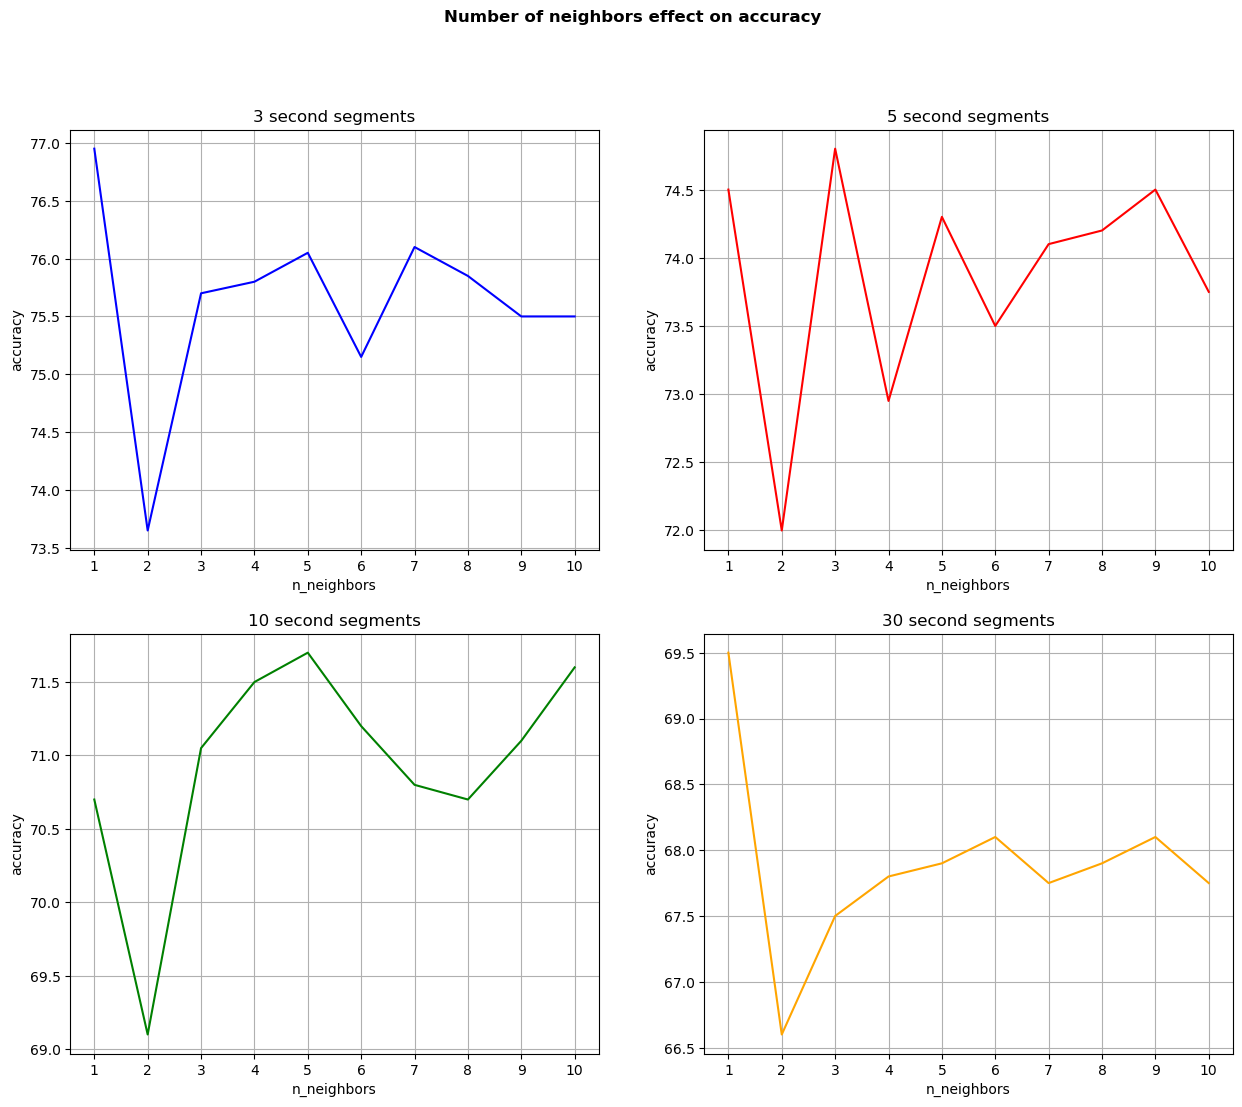

In [206]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Number of neighbors effect on accuracy", fontweight = "bold")
ax[0, 0].plot(data_3sec.keys(), data_3sec.values*100, color = "blue")
ax[0, 0].set_xticks(data_3sec.keys())
ax[0, 0].set_xlabel("n_neighbors")
ax[0, 0].set_ylabel("accuracy")
ax[0, 0].grid(True)
ax[0, 0].title.set_text("3 second segments")

ax[0, 1].plot(data_5sec.keys(), data_5sec.values*100, color = "red")
ax[0, 1].set_xticks(data_5sec.keys())
ax[0, 1].set_xlabel("n_neighbors")
ax[0, 1].set_ylabel("accuracy")
ax[0, 1].grid(True)
ax[0, 1].title.set_text("5 second segments")

ax[1, 0].plot(data_10sec.keys(), data_10sec.values*100, color = "green")
ax[1, 0].set_xticks(data_10sec.keys())
ax[1, 0].set_xlabel("n_neighbors")
ax[1, 0].set_ylabel("accuracy")
ax[1, 0].grid(True)
ax[1, 0].title.set_text("10 second segments")

ax[1, 1].plot(data_30sec.keys(), data_30sec.values*100, color = "orange")
ax[1, 1].set_xticks(data_30sec.keys())
ax[1, 1].set_xlabel("n_neighbors")
ax[1, 1].set_ylabel("accuracy")
ax[1, 1].grid(True)
ax[1, 1].title.set_text("30 second segments")

plt.show()

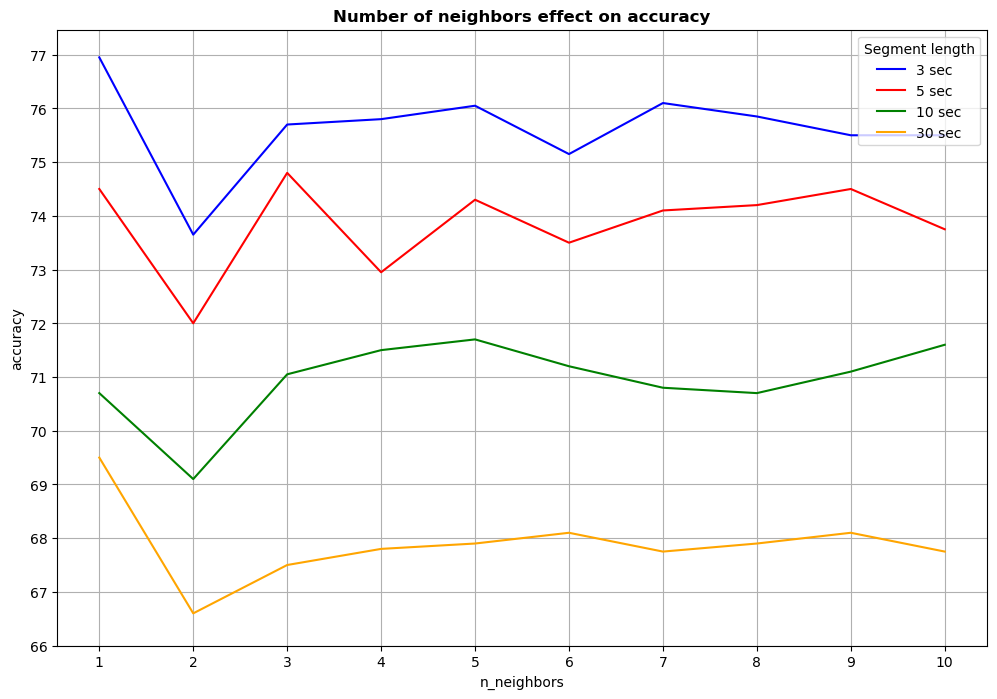

In [234]:
plt.figure(figsize = (12, 8))
plt.plot(data_3sec.keys(), data_3sec.values*100, color = "blue", label="3 sec")
plt.plot(data_5sec.keys(), data_5sec.values*100, color = "red", label="5 sec")
plt.plot(data_10sec.keys(), data_10sec.values*100, color = "green", label="10 sec")
plt.plot(data_30sec.keys(), data_30sec.values*100, color = "orange", label="30 sec")
plt.xticks(data_3sec.keys())
plt.yticks(np.arange(66, 78, 1))
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.grid(True)
plt.title("Number of neighbors effect on accuracy", fontweight = "bold")
plt.legend(loc="upper right", title = "Segment length")
plt.show()